## Learning Slowdown
#### Daniel Espinosa 136981

El ejemplo ilustrativo del *learning slowdown* se hará con una red neuronal de topología **2-1-1-1**, de esta forma será sencillo ilustrar cómo cambian los pesos de las neuronas en las diferentes capas durante las iteraciones de entrenamiento.

La información con la que se entrenará la red será la función XOR, de esta manera es un problema sencillo pero uno que solamente tiene una solución óptima con varias neuronas.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Función XOR

In [2]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

In [62]:
#dimensiones de los datos de entrada y salida, para las dimensiones de las capas correspondientes
input_size=2
hidden_layer1_size=1
hidden_layer2_size=1
output_layer_size=1

#Placeholders para los datos de entrada, incluida la y real, ya que es una entrada en el entrenamiento.
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real


#La variables para lo que se va a ir calculando y modificando en el camino
#primera capa
W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden_layer1_size], -1, 1), name="W_layer1") #weights
b_layer1 = tf.Variable(tf.zeros([hidden_layer1_size]), name="b_layer1") #bias

#Para la segunda capa
W_layer2 = tf.Variable(tf.random_uniform([hidden_layer1_size,hidden_layer2_size], -1, 1), name="W_layer2") #weights
b_layer2 = tf.Variable(tf.zeros([hidden_layer2_size]), name="b_layer2") #bias

#Para la tercera capa
W_layer3 = tf.Variable(tf.random_uniform([hidden_layer2_size,output_layer_size], -1, 1), name="W_layer3") #weights
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer3") #bias

In [63]:
#Definir las funciones por capas, para que el grafo sepa aplicar backpropagation correctamente
inter1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
inter2 = tf.nn.sigmoid(tf.matmul(inter1,W_layer2)+b_layer2)
y = tf.nn.sigmoid(tf.matmul(inter2,W_layer3) + b_layer3)


lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #error cuadratico (se puede hacer con cross entropy)

#Se define como optimizar la loss function y el learning rate
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

Iniciamos la sesión.

In [64]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Creamos las listas para guardar los deltas de los pesos de cada iteración.

In [65]:
num_iterations = 100000

ws = np.array([np.zeros(num_iterations),np.zeros(num_iterations),np.zeros(num_iterations)])
bs = np.array([np.zeros(num_iterations),np.zeros(num_iterations),np.zeros(num_iterations)])

In [66]:
sess.run(init)
for i in range(num_iterations):
    sess.run(train_step, feed_dict={x: X, y_: Y}) #Corre sobre todo el input
  
    bs[0][i] = sess.run(b_layer1, feed_dict={x: X, y_: Y})[0] #solo habra 1
    bs[1][i] = sess.run(b_layer2, feed_dict={x: X, y_: Y})[0] #solo habra 1
    bs[2][i] = sess.run(b_layer3, feed_dict={x: X, y_: Y})[0] #solo habra 1
    
    ws[0][i] = sess.run(W_layer1, feed_dict={x: X, y_: Y})[0] #solo habra 1
    ws[1][i] = sess.run(W_layer2, feed_dict={x: X, y_: Y})[0] #solo habra 1
    ws[2][i] = sess.run(W_layer3, feed_dict={x: X, y_: Y})[0] #solo habra 1

#Aseguremos que el modelo tenga accuracy de 1.

#correct_prediction = tf.equal(tf.round(y),y_) # Tensor de booleanos que indican si la entrada en la prediccion (redondeada) fue correcta.
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Casteo a float de los booleanos, sacar promedio de las entradas

#while(sess.run(accuracy, feed_dict={x: X, y_: Y}) != 1):
#    for i in range(1000):
#      sess.run(train_step, feed_dict={x: X, y_: Y})

Calcular el cambio de los pesos en cada iteración

delta peso en i = peso en i - peso en i-1

In [67]:
#arreglos para los deltas
dws = np.array([np.zeros(num_iterations-1),np.zeros(num_iterations-1),np.zeros(num_iterations-1)])
dbs = np.array([np.zeros(num_iterations-1),np.zeros(num_iterations-1),np.zeros(num_iterations-1)])

for i in range(1,num_iterations):
    dws[0][i-1] = ws[0][i] - ws[0][i-1]
    dws[1][i-1] = ws[1][i] - ws[1][i-1]
    dws[2][i-1] = ws[2][i] - ws[2][i-1]
    
    dbs[0][i-1] = bs[0][i] - bs[0][i-1]
    dbs[1][i-1] = bs[1][i] - bs[1][i-1]
    dbs[2][i-1] = bs[2][i] - bs[2][i-1]
    

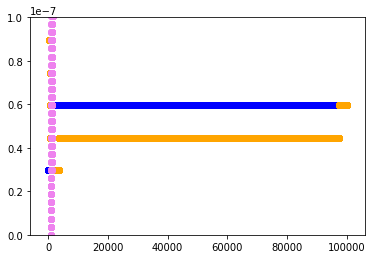

In [85]:
x_space = np.linspace(0,num_iterations-1,num_iterations-1)

plt.scatter(x_space,abs(dws[0]),c='blue')
plt.scatter(x_space,abs(dws[1]),c='orange')
plt.scatter(x_space,abs(dws[2]),c='violet')
plt.ylim([0,0.0000001])
plt.show()


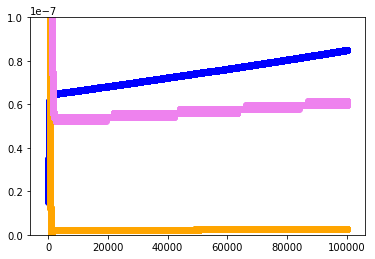

In [83]:
plt.scatter(x_space,abs(dbs[0]),c='blue')
plt.scatter(x_space,abs(dbs[1]),c='orange')
plt.scatter(x_space,abs(dbs[2]),c='violet')
plt.ylim([0,0.0000001])
plt.show()

In [70]:
#Cerramos sesion
sess.close()

Se puede observar que en general el cambio en los pesos sí es mayor en la última capa, representado por la línea rosa. En este caso en particular para los pesos w, la última capaa tiene cambios más grandes, seguida por la primera capa y luego la intermedia. En los sesgos, la primera capa tiene cambios más grandes, seguida por la última capa y la capa intermedia tiene deltas muy pequeños.